## Image Processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
train_dir = "/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Train/"
test_dir = "/kaggle/input/pepsico-lab-potato-quality-control/Pepsico RnD Potato Lab Dataset/Test/"


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, labels='inferred')
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, labels='inferred')
class_names = train_ds.class_names

Found 769 files belonging to 2 classes.
Found 192 files belonging to 2 classes.


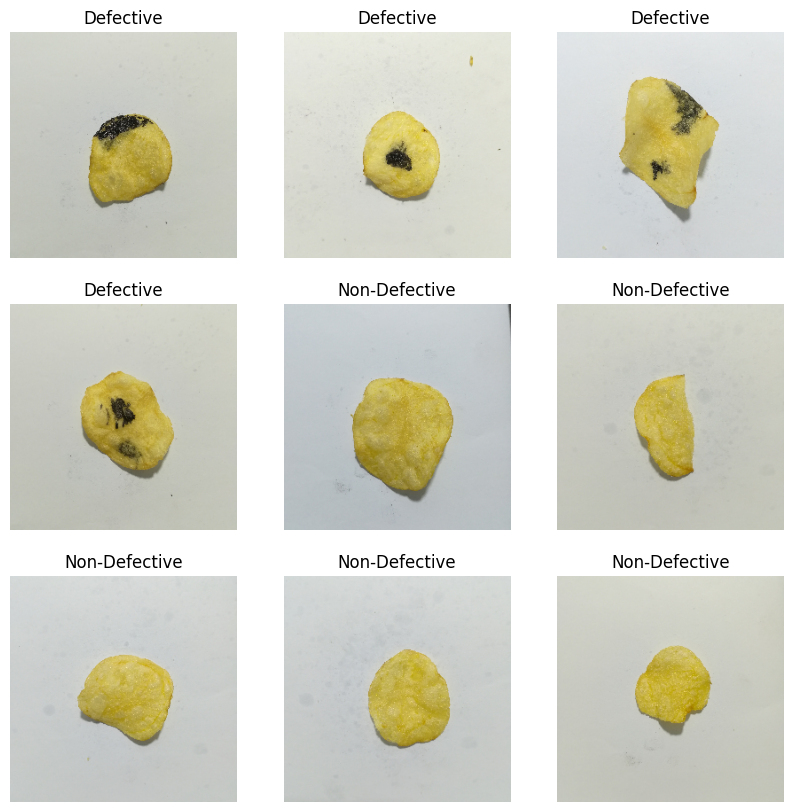

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Machine Learning Model

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [7]:
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=50
)


Epoch 1/50
25/25 [==============================] - 56s 2s/step - loss: 0.7027 - accuracy: 0.5306 - val_loss: 0.6936 - val_accuracy: 0.4792
Epoch 2/50
25/25 [==============================] - 43s 2s/step - loss: 0.6965 - accuracy: 0.5124 - val_loss: 0.6917 - val_accuracy: 0.5208
Epoch 3/50
25/25 [==============================] - 43s 2s/step - loss: 0.7043 - accuracy: 0.6879 - val_loss: 0.4884 - val_accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 43s 2s/step - loss: 0.3774 - accuracy: 0.8544 - val_loss: 7.6711 - val_accuracy: 0.4792
Epoch 5/50
25/25 [==============================] - 43s 2s/step - loss: 1.0509 - accuracy: 0.6814 - val_loss: 0.3828 - val_accuracy: 0.9531
Epoch 6/50
25/25 [==============================] - 42s 2s/step - loss: 0.1785 - accuracy: 0.9571 - val_loss: 0.2618 - val_accuracy: 0.9375
Epoch 7/50
25/25 [==============================] - 43s 2s/step - loss: 0.1619 - accuracy: 0.9532 - val_loss: 0.1587 - val_accuracy: 0.9896
Epoch 8/50
25/25 [==

In [8]:
#model.save_weights('./checkpoints/final')

## Showcase

In [9]:
model.load_weights('./checkpoints/final')
loss, acc = model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./checkpoints/final